# IMPORTING DATASET AND BASIC LIBRARIES

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [201]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

Populating the interactive namespace from numpy and matplotlib


In [202]:
from sklearn.datasets import load_boston

# LOADING DATA

In [203]:
X , y = load_boston(return_X_y=True)

# FIRST LOOK AT DATA
let us analyse the data and try to get some intuition

In [204]:
#Lets check the dimentionality
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [205]:
#lets reshape y so that it becomes 2D rather than 1D its now that helps with some functions
#y = y.reshape(len(y),1)
#print(y.shape)

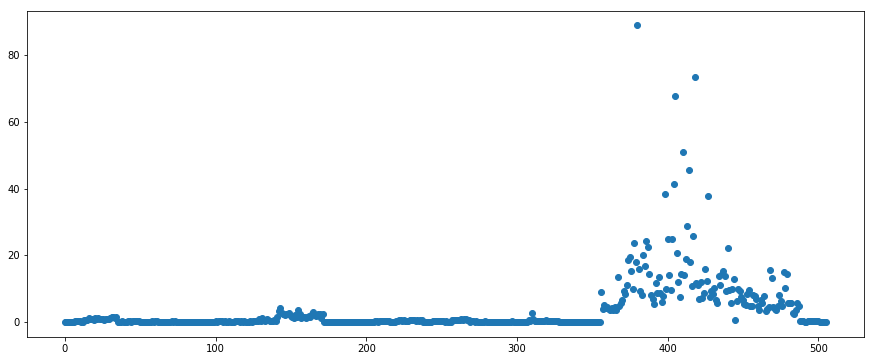

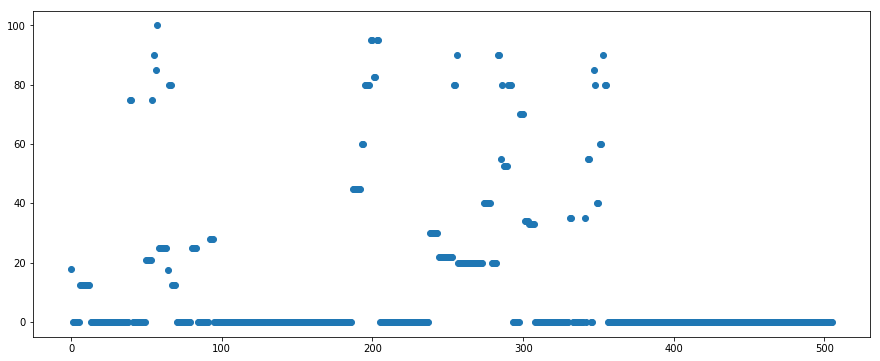

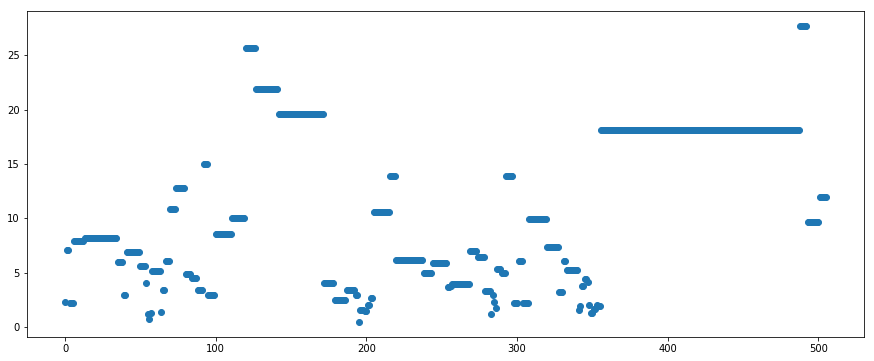

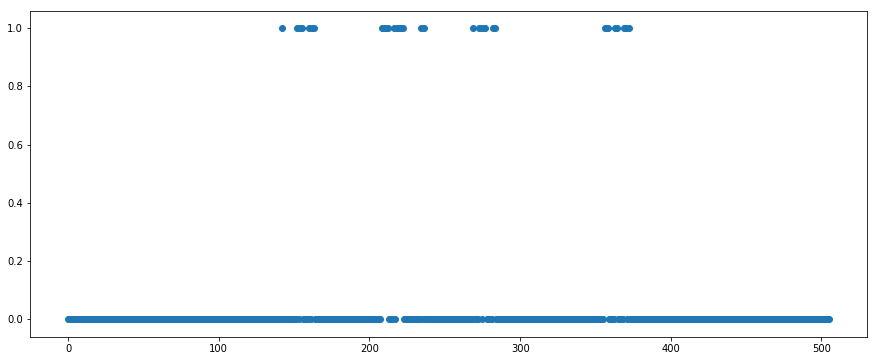

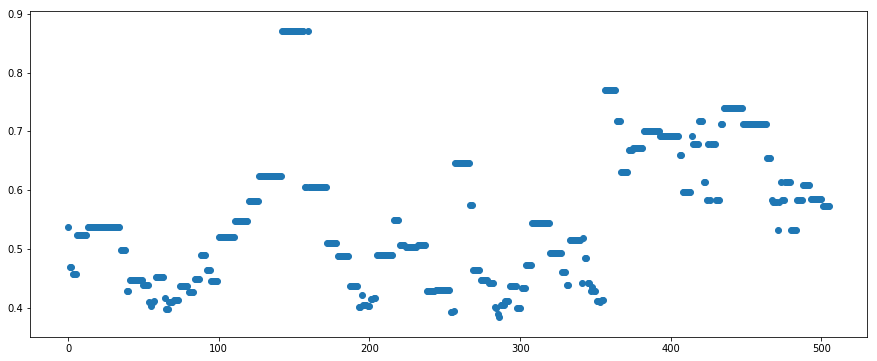

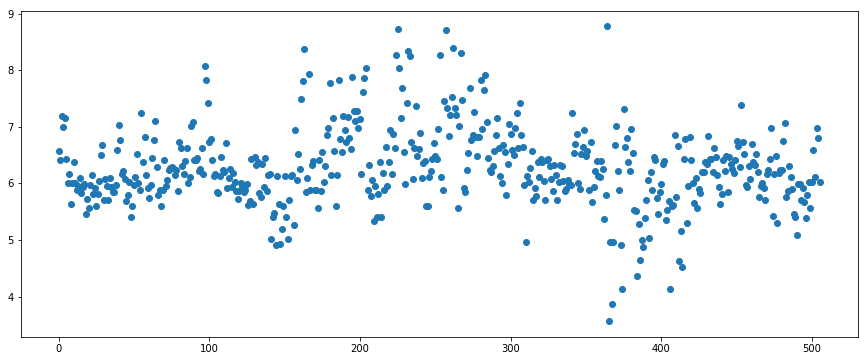

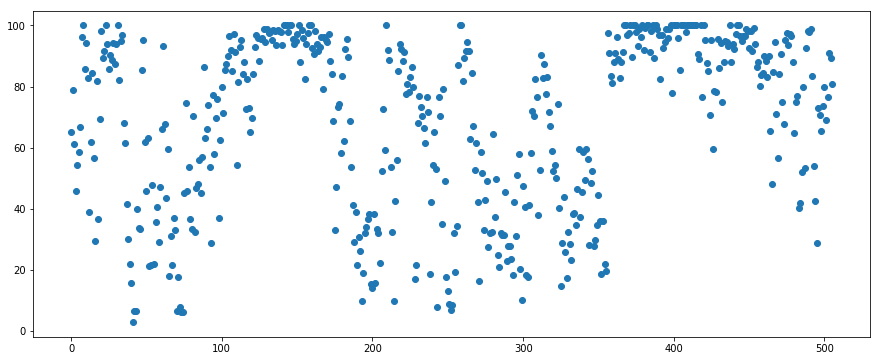

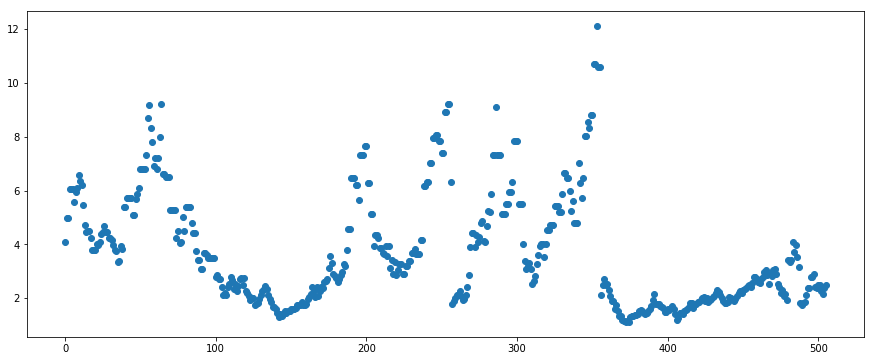

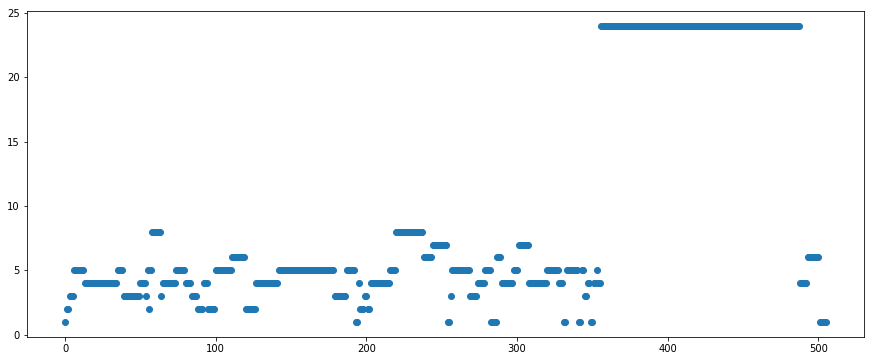

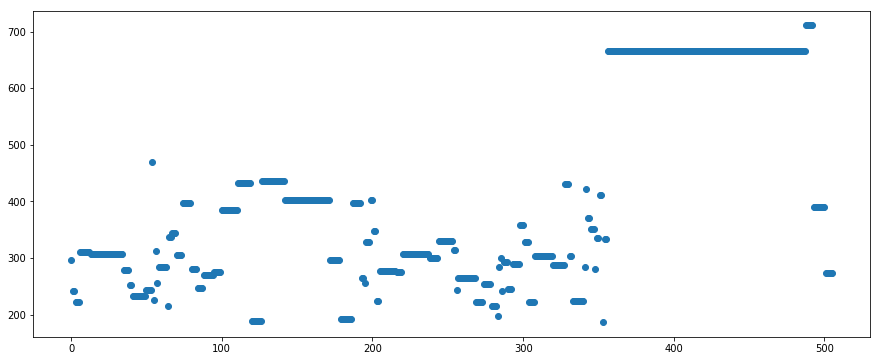

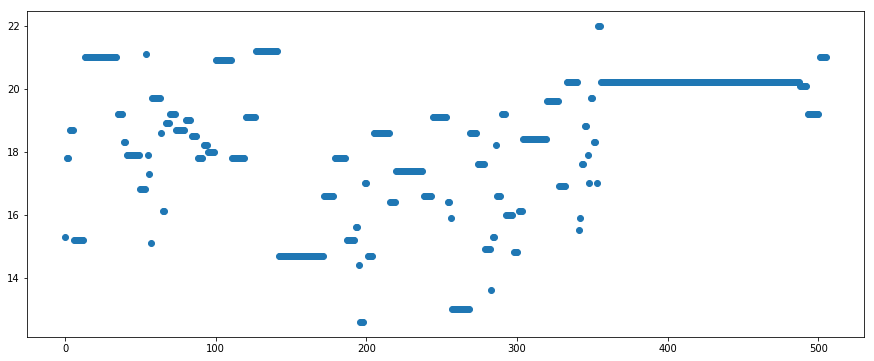

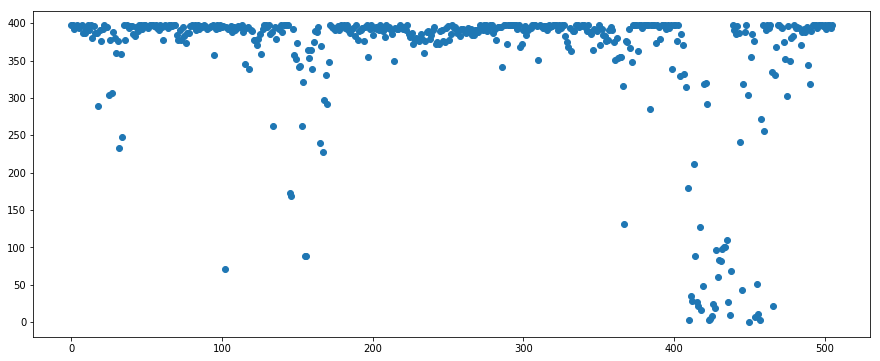

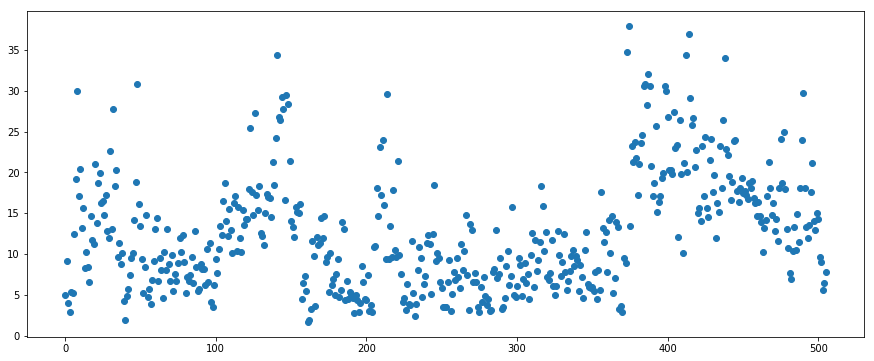

In [206]:
# so there are 13 features availible in X , lets check them out
for i in range(X.shape[1]):
    plt.scatter(range(len(X)),X[:,i])
    plt.show()

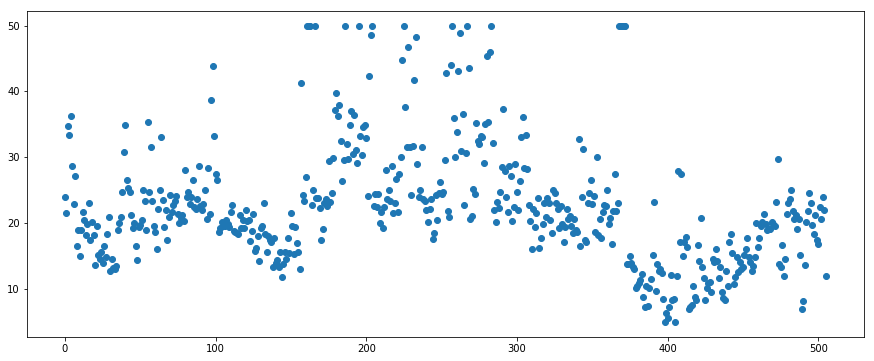

In [207]:
# lets check y out too
plt.scatter(range(len(y)),y)
plt.show()

# FEATURE SCALING DATA
Feature Scaling is important when values of features vary a lot in size. Eg : One feature may have range from 4000-10000 while other might be only from 1-6
 <br>
 While some models in sklearn handle t themsleves , one can never be too sure

In [208]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)
y = scl.fit_transform(y.reshape(len(y),1))

# SPLITTING INTO TRAINING , TEST AND CROSS VALIDATION SET
its a good practice to split your data into a training set , a cross validation set to check your progress and prevent overfitting and a test set to finally show the result in 60:20:20 ratio
<font color=red>WARNING !!!!</font> NEVER use your cross validation set for reporting result. it may be biased towards your model<br>
(you can use more advanced techniques like K-Fold splitting but lets use the simple one here)


In [209]:
from sklearn.cross_validation import train_test_split
X_train , X_temp , y_train , y_temp = train_test_split(X,y,test_size = 0.4)
X_cv , X_test , y_cv , y_test = train_test_split(X_temp,y_temp,test_size = 0.5)

#check the sizes
print("X Test: " + str(len(X_train)))
print("X Train: " + str(len(X_test)))
print("X Cross Validaion: " + str(len(X_cv)))
print("y Test: " + str(len(y_train)))
print("y Train: " + str(len(y_test)))
print("y Cross Validation: " + str(len(y_cv)))

X Test: 303
X Train: 102
X Cross Validaion: 101
y Test: 303
y Train: 102
y Cross Validation: 101


# NOW LETS GET STARTED WITH MODELS

### MULTIVARIATE LINEAR REGRESSION

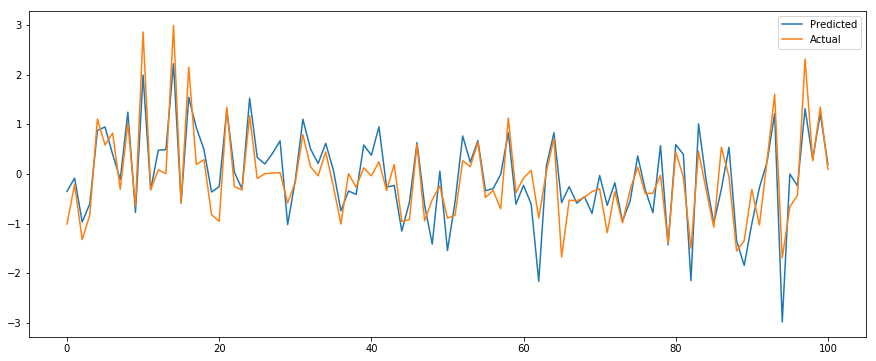

Mean Squared Error: 0.210349984268
R Squared Score: 0.722540091076


In [210]:
#importing model Class
from sklearn.linear_model import LinearRegression

#declaring a model class object
lin_reg = LinearRegression()

#fitting the model
lin_reg.fit(X_train,y_train)

#getting error on cross validation set
from sklearn import metrics
y_predcv_lin = lin_reg.predict(X_cv)
ms_lin = metrics.mean_squared_error(y_true= y_cv,y_pred=y_predcv_lin)  #mean squared error
r2_lin = metrics.r2_score(y_true= y_cv,y_pred=y_predcv_lin)            #r square score

#plotting predictions and actual
plt.plot(range(len(y_predcv_lin)),y_predcv_lin , label = "Predicted")
plt.plot(range(len(y_cv)),y_cv , label = "Actual")
plt.legend()
plt.show()

print("Mean Squared Error: " + str(ms_lin))
print("R Squared Score: "+ str(r2_lin))

### POLYNOMIAL LINEAR REGRESSION

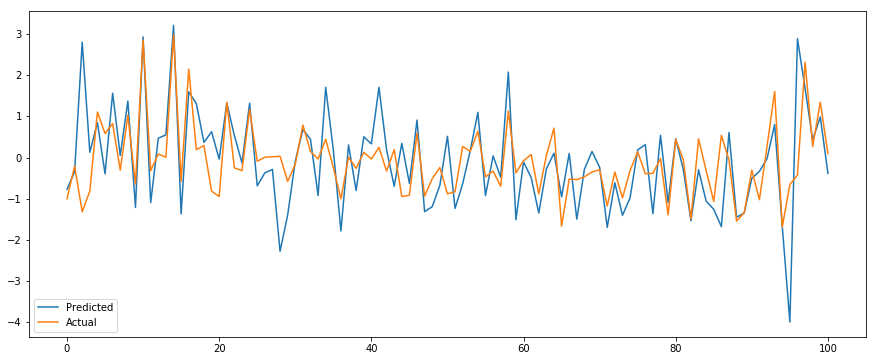

Mean Squared Error: 0.851665130533
R Squared Score: -0.123379829921


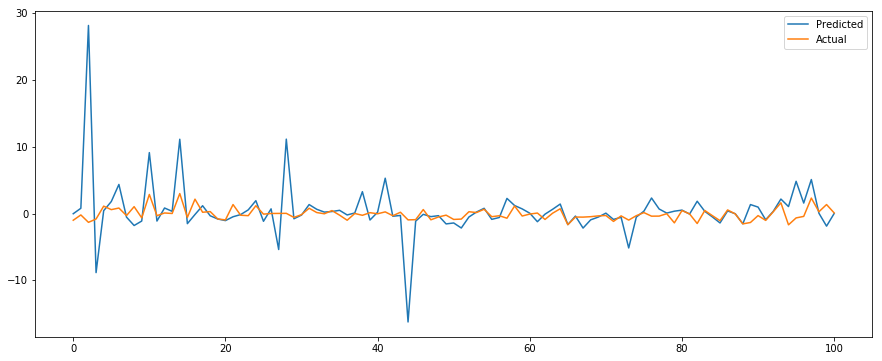

Mean Squared Error: 16.2266042657
R Squared Score: -20.4035297287


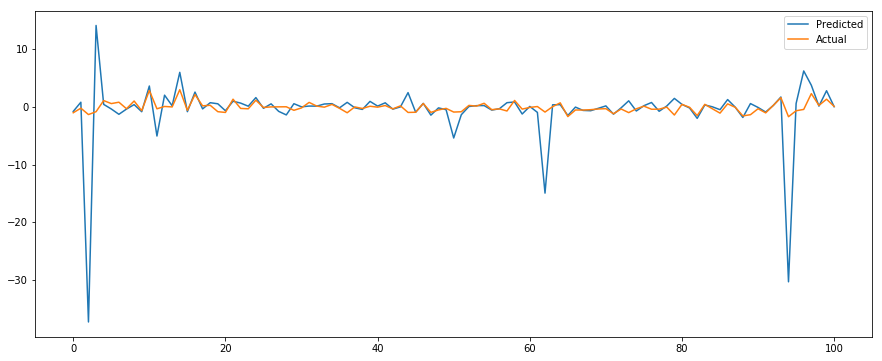

Mean Squared Error: 26.7159652656
R Squared Score: -34.2394097636


In [211]:
# creating polynomial features out of existing features of X
from sklearn.preprocessing import PolynomialFeatures
pf2 = PolynomialFeatures(degree=2) #trying out 3 different values of degree
pf3 = PolynomialFeatures(degree=3)
pf4 = PolynomialFeatures(degree=4)

pf2.fit(X)
pf3.fit(X)
pf4.fit(X)

#importing model Class (we use linear model here)
from sklearn.linear_model import LinearRegression

#declaring a model class object
lin_reg2 = LinearRegression()
lin_reg3 = LinearRegression()
lin_reg4 = LinearRegression()

#fitting the model
lin_reg2.fit(pf2.transform(X_train),y_train)
lin_reg3.fit(pf3.transform(X_train),y_train)
lin_reg4.fit(pf4.transform(X_train),y_train)

#getting error on cross validation set
from sklearn import metrics

y_predcv2 = lin_reg2.predict(pf2.transform(X_cv))
ms_lin2 = metrics.mean_squared_error(y_true= y_cv,y_pred=y_predcv2)  #mean squared error
r2_lin2 = metrics.r2_score(y_true= y_cv,y_pred=y_predcv2)            #r square score

y_predcv3 = lin_reg3.predict(pf3.transform(X_cv))
ms_lin3 = metrics.mean_squared_error(y_true= y_cv,y_pred=y_predcv3)  #mean squared error
r2_lin3 = metrics.r2_score(y_true= y_cv,y_pred=y_predcv3)            #r square score

y_predcv4 = lin_reg4.predict(pf4.transform(X_cv))
ms_lin4 = metrics.mean_squared_error(y_true= y_cv,y_pred=y_predcv4)  #mean squared error
r2_lin4 = metrics.r2_score(y_true= y_cv,y_pred=y_predcv4)            #r square score

#plotting predictions and actual
plt.plot(range(len(y_predcv2)),y_predcv2 , label = "Predicted")
plt.plot(range(len(y_cv)),y_cv , label = "Actual")
plt.legend()
plt.show()

print("Mean Squared Error: " + str(ms_lin2))
print("R Squared Score: "+ str(r2_lin2))


plt.plot(range(len(y_predcv3)),y_predcv3 , label = "Predicted")
plt.plot(range(len(y_cv)),y_cv , label = "Actual")
plt.legend()
plt.show()

print("Mean Squared Error: " + str(ms_lin3))
print("R Squared Score: "+ str(r2_lin3))


plt.plot(range(len(y_predcv4)),y_predcv4 , label = "Predicted")
plt.plot(range(len(y_cv)),y_cv , label = "Actual")
plt.legend()
plt.show()

print("Mean Squared Error: " + str(ms_lin4))
print("R Squared Score: "+ str(r2_lin4))

### SVM REGRESSION
Note: This requires feature scaling to work properly

C:\Users\Ayush\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


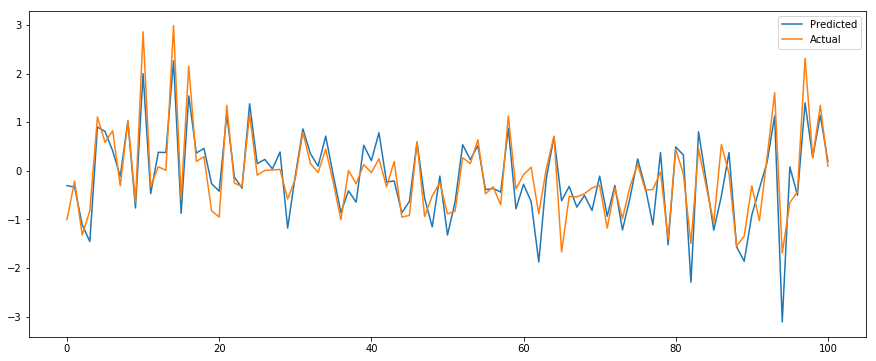

Mean Squared Error: 0.177852545025
R Squared Score: 0.765405492583


In [212]:
#importing model Class
from sklearn.svm import SVR

#declaring a model class object
svr = SVR(kernel='linear')

#fitting the model
svr.fit(X_train,y_train)

#getting error on cross validation set
from sklearn import metrics
y_predcv_svr = svr.predict(X_cv)
ms_svr = metrics.mean_squared_error(y_true= y_cv,y_pred=y_predcv_svr)  #mean squared error
r2_svr = metrics.r2_score(y_true= y_cv,y_pred=y_predcv_svr)            #r square score

#plotting predictions and actual
plt.plot(range(len(y_predcv_svr)),y_predcv_svr , label = "Predicted")
plt.plot(range(len(y_cv)),y_cv , label = "Actual")
plt.legend()
plt.show()

print("Mean Squared Error: " + str(ms_svr))
print("R Squared Score: "+ str(r2_svr))

# DECISION TREE

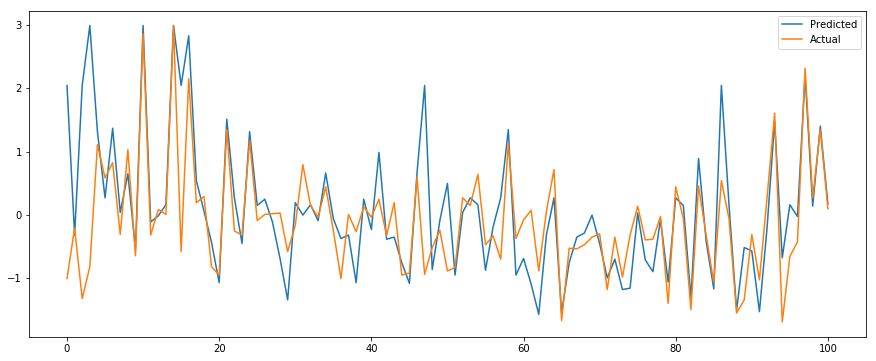

Mean Squared Error: 0.701454003549
R Squared Score: 0.0747545590941


In [213]:
#importing model Class
from sklearn.tree import DecisionTreeRegressor

#declaring a model class object
tree = DecisionTreeRegressor(criterion='mse')

#fitting the model
tree.fit(X_train,y_train)

#getting error on cross validation set
from sklearn import metrics
y_predcv_tree = tree.predict(X_cv)
ms_tree = metrics.mean_squared_error(y_true= y_cv,y_pred=y_predcv_tree)  #mean squared error
r2_tree = metrics.r2_score(y_true= y_cv,y_pred=y_predcv_tree)            #r square score

#plotting predictions and actual
plt.plot(range(len(y_predcv_tree)),y_predcv_tree , label = "Predicted")
plt.plot(range(len(y_cv)),y_cv , label = "Actual")
plt.legend()
plt.show()

print("Mean Squared Error: " + str(ms_tree))
print("R Squared Score: "+ str(r2_tree))

# RANDOM FOREST

C:\Users\Ayush\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Ayush\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Ayush\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


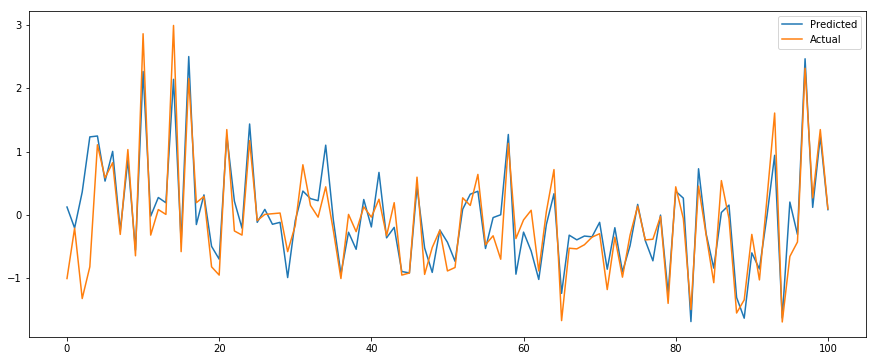

Mean Squared Error: 0.167178346165
R Squared Score 0.779485181031


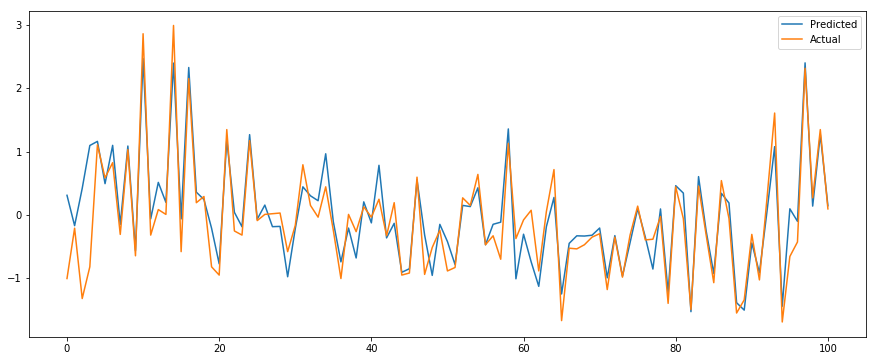

Mean Squared Error: 0.162856420698
R Squared Score 0.78518597084


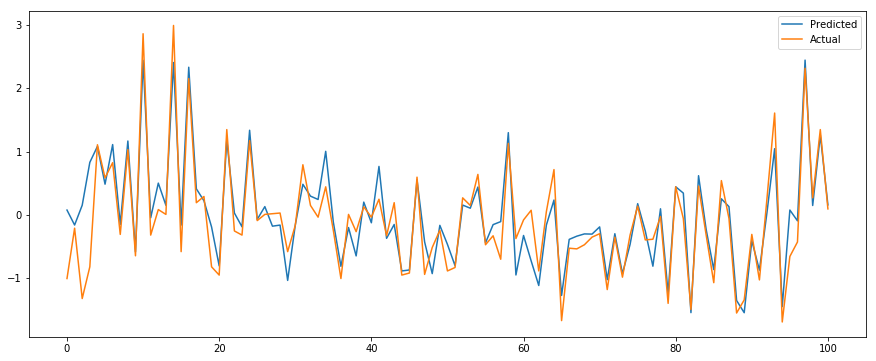

Mean Squared Error: 0.137166246343
R Squared Score 0.819072322016


In [214]:
#importing model Class
from sklearn.ensemble import RandomForestRegressor

#declaring a model class object
rtree10 = RandomForestRegressor(n_estimators=10)
rtree100 = RandomForestRegressor(n_estimators=100)
rtree300 = RandomForestRegressor(n_estimators=300)

#fitting the model
rtree10.fit(X_train,y_train)
rtree100.fit(X_train,y_train)
rtree300.fit(X_train,y_train)

#getting error on cross validation set
from sklearn import metrics
y_predcv_rtree10 = rtree10.predict(X_cv)
ms_rtree10 = metrics.mean_squared_error(y_true= y_cv,y_pred=y_predcv_rtree10)  #mean squared error
r2_rtree10 = metrics.r2_score(y_true= y_cv,y_pred=y_predcv_rtree10)            #r square score

y_predcv_rtree100 = rtree100.predict(X_cv)
ms_rtree100 = metrics.mean_squared_error(y_true= y_cv,y_pred=y_predcv_rtree100)  #mean squared error
r2_rtree100 = metrics.r2_score(y_true= y_cv,y_pred=y_predcv_rtree100)            #r square score

y_predcv_rtree300 = rtree300.predict(X_cv)
ms_rtree300 = metrics.mean_squared_error(y_true= y_cv,y_pred=y_predcv_rtree300)  #mean squared error
r2_rtree300 = metrics.r2_score(y_true= y_cv,y_pred=y_predcv_rtree300)            #r square score

#plotting predictions and actual
plt.plot(range(len(y_predcv_rtree10)),y_predcv_rtree10 , label = "Predicted")
plt.plot(range(len(y_cv)),y_cv , label = "Actual")
plt.legend()
plt.show()
print("Mean Squared Error: " + str(ms_rtree10))
print("R Squared Score "+ str(r2_rtree10))

plt.plot(range(len(y_predcv_rtree100)),y_predcv_rtree100 , label = "Predicted")
plt.plot(range(len(y_cv)),y_cv , label = "Actual")
plt.legend()
plt.show()
print("Mean Squared Error: " + str(ms_rtree100))
print("R Squared Score "+ str(r2_rtree100))

plt.plot(range(len(y_predcv_rtree300)),y_predcv_rtree300 , label = "Predicted")
plt.plot(range(len(y_cv)),y_cv , label = "Actual")
plt.legend()
plt.show()
print("Mean Squared Error: " + str(ms_rtree300))
print("R Squared Score "+ str(r2_rtree300))

# COMPARING ALL MODELS
Now lets apply all our models on testdata and find their performance

In [215]:
headers = [
    "Linear",  
    "Polynomial Degree 2",  
    "Polynomial Degree 3",  
    "Polynomial Degree 4",  
    "SVR",  
    "Tree",  
    "Random Forest 10 Trees",  
    "Random Forest 100 Trees",
    "Random Forest 300 Trees",]
,

#obtaining predictions
y_pred = [
    lin_reg.predict(X_test),  
    lin_reg2.predict(pf2.transform(X_test)),  
    lin_reg3.predict(pf3.transform(X_test)),  
    lin_reg4.predict(pf4.transform(X_test)),  
    svr.predict(X_test),  
    tree.predict(X_test),  
    rtree10.predict(X_test),  
    rtree100.predict(X_test),
    rtree300.predict(X_test),
]

#obtainig errors
ms = []
r2 = []
for pred in y_pred:
    ms.append(metrics.mean_squared_error(y_true= y_test,y_pred=pred))
    r2.append(metrics.r2_score(y_true= y_test,y_pred=pred))

### LET US LOOK AT THE RESULTS

In [216]:
for i in range(len(headers)):
    print(str(headers[i]) + "  -  " + str(ms[i]) + "  -  " + str(r2[i]))

Linear  -  0.331886754808  -  0.744431622458
Polynomial Degree 2  -  0.547342799792  -  0.578520355888
Polynomial Degree 3  -  8.94140479061  -  -5.88530133298
Polynomial Degree 4  -  1.63828536098  -  -0.261556617096
SVR  -  0.369177063319  -  0.71571633477
Tree  -  0.538227904211  -  0.585539253272
Random Forest 10 Trees  -  0.21420619795  -  0.835051174304
Random Forest 100 Trees  -  0.192113094002  -  0.852063901233
Random Forest 300 Trees  -  0.169119217823  -  0.869770265056


We can clearly see that Polynomial Degree 3 and 4 have huge errors so they are removed

In [217]:
head=[]
y_tmp = []
ms_tmp = []
r2_tmp = []
for i in range(len(headers)):
    if i != 2 and i != 3:
        head.append(headers[i])
        y_tmp.append(y_pred[i])
        ms_tmp.append(ms[i])
        r2_tmp.append(r2[i])
headers = head
y_pred = y_tmp
ms = ms_tmp
r2 = r2_tmp
len(headers)

7

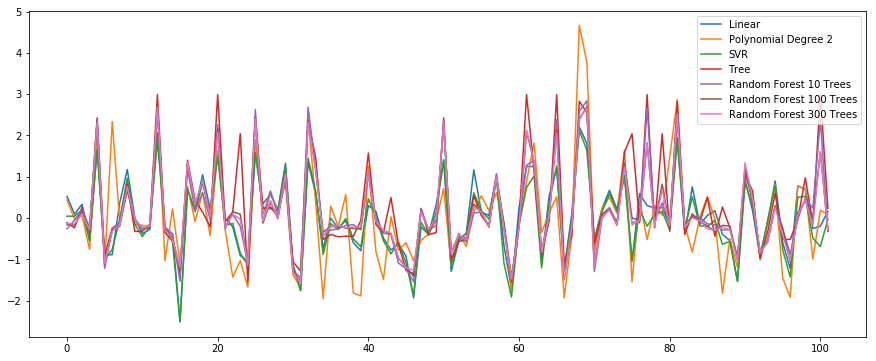

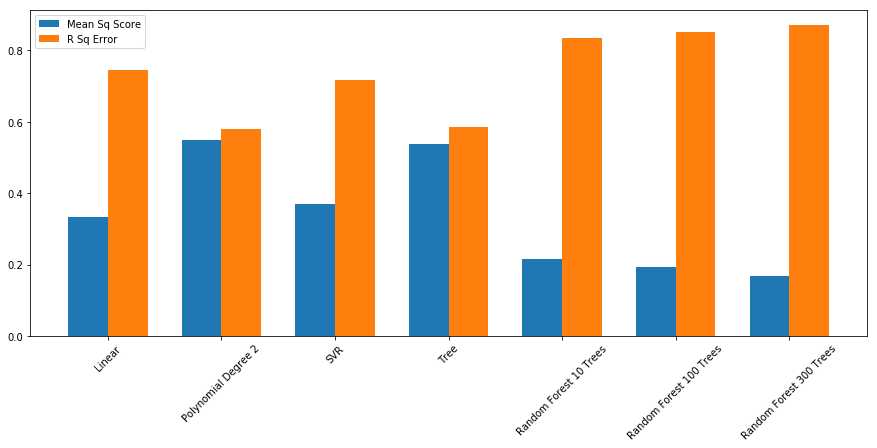

In [218]:
#plotting all results
for i in range(len(y_pred)):
    plt.plot(range(len(y_pred[i])),y_pred[i],label = headers[i])
plt.legend()
plt.show()

fig , ax = plt.subplots()
n = len(headers)
width = 0.35
ind = np.arange(n)
ax.bar(ind,ms,width,label = 'Mean Sq Score')
ax.bar(ind + width,r2,width,label = 'R Sq Error')
ax.set_xticks(ind + width / 2)
plt.xticks(rotation=45)
ax.set_xticklabels(headers)
ax.legend()
plt.show()